In [64]:
import sim
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial,stats
from tqdm import tqdm

In [74]:
def get_mipd(df,bins=50):
    rs = sim.utils.points2radius(df)
    counts,bins = np.histogram(rs,bins=bins)
    vols = ((4/3) * np.pi * (bins[1:])**2) - ((4/3) * np.pi * (bins[:-1])**2)
    densities = vols/counts
    densities[densities == np.inf] = 0
    return np.sum(densities * counts)/np.sum(counts)

def mipd(n,bins=50,Rs=1):
    df = sim.halos.Sample.NFW(n,Rs=Rs)
    mipd = get_mipd(df,bins)
    return mipd

def calc_and_fit(Rs,bins=50):
    ns = 10 ** np.arange(3,7)
    ys = []
    xs = []
    for n in tqdm(ns):
        for i in range(3):
            xs.append(n)
            ys.append(mipd(n,bins=bins,Rs=Rs))
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(np.array(xs)),np.log(np.array(ys)))
    return slope,intercept
    

In [85]:
Rss = [1,2,5,10,20,50]
intercepts = []
slopes = []
for Rs in Rss:
    slope,intercept = calc_and_fit(Rs)
    slopes.append(slope)
    intercepts.append(intercept)

100%|██████████| 4/4 [00:17<00:00,  4.30s/it]


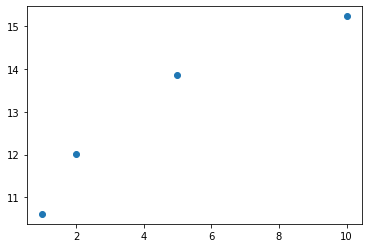

In [84]:
plt.scatter(Rss,intercepts)
plt.show()

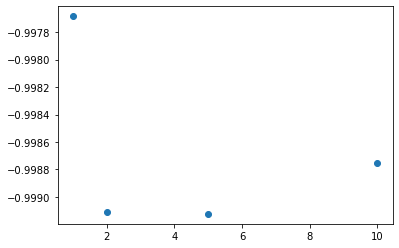

In [80]:
plt.scatter(Rss,slopes)

In [66]:
ns = 10 ** np.arange(3,7)
ys = []
xs = []
for n in tqdm(ns):
    for i in range(3):
        xs.append(n)
        ys.append(mipd(n,bins=50))

100%|██████████| 4/4 [00:17<00:00,  4.42s/it]


In [67]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(np.array(xs)),np.log(np.array(ys)))
print(slope,intercept)
def logy(logx,slope = slope, intercept = intercept):
    return logx * slope + intercept

def y(x):
    return np.exp(logy(np.log(x)))

-0.9989356540733827 10.629640145256275


In [73]:
print(y(100))

415.4538152136986


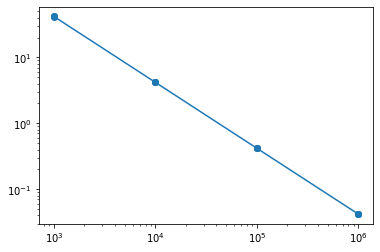

In [62]:
fit_ys = []
fit_xs = np.linspace(np.min(xs),np.max(xs),1000)
for x in fit_xs:
    fit_ys.append(y(x))

plt.plot(fit_xs,fit_ys)
plt.scatter(xs,ys)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [58]:
def mipd_uniform(n,r=1):
    return ((4/3) * np.pi * r**3)/n

In [59]:
ns2 = 10 ** np.arange(3,7)
ys2 = []
xs2 = []
for n in tqdm(ns2):
    for i in range(3):
        xs2.append(n)
        ys2.append(mipd_uniform(n))

100%|██████████| 4/4 [00:00<00:00, 9054.08it/s]


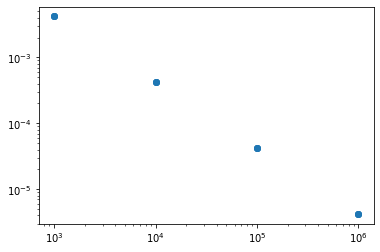

In [61]:
plt.scatter(xs2,ys2)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [86]:
def density_integral(min=1e-3,max=200,Rs=1):
    def integral(x):
        return Rs * ( (Rs/(Rs+x)) - np.log(Rs + x) + np.log(x))
    
    return integral(max) - integral(min)

In [89]:
def inverse_density(r,Rs=1):
    def density(x):
        return 1/( (x/Rs) * (1 + (x/Rs))**2 )
    print(density(Rs/2))

In [88]:
(density_integral(Rs=1)/10000)

0.0005909741363181291